# Continuous Distributions

Compare versus the "coin flip" distributions in which our observed values only come from a discrete (either finite or countably infinite) set of possibilities. In a discrete distribution, there are single "elements" or "atoms" that have a non-zero probability of appearing, e.g. $P(HEADS) = 0.5$.

In a continous distribution, there are no single "atoms" that have a non-zero probability.

Example: a uniformly random value between $a$ and $b$, $U(a,b)$. In this case, simplify to $a=0$, $b=1$, then $P(0.5) = 0$. *But* the _distribution function_ of these values is not 0 between $a$ and $b$. 

For $U(a,b)$, the _pdf_ aka "probability density function" is
$$ f(x) = \begin{cases} \frac{1}{b-a} \quad a \leq x \leq b \\ 0 \quad \text{otherwise}. \end{cases} $$

The _cdf_ aka "cumulative density function" for this is
$$ F(x) = P(\text{value is at most } x) = \int_{-\infty}^{x} f(t) dt.$$
For $U(a,b)$ the cdf is going to be
$$ F(x) = \int_{-\infty}^{x} \frac{1}{b-a} dt = \int_{a}^{x} \frac{1}{b-a} dt  = \frac{t}{b-a} \Bigg|_{a}^{x} = \frac{x-a}{b-a}$$
taking care of other cases:
$$ F(x) = \begin{cases} 0 \quad x < a \\ \frac{x-a}{b-a} \quad a \leq x \leq b \\ 1 \quad x > b \end{cases} $$

In [14]:
# Not all distributions have a PDF.
def uniform_pdf(x: float, a: float, b: float):
    return 1/(b-a) if a <= x <= b else 0

In [15]:
# All distributions have a CDF.
def uniform_cdf(x: float, a: float, b: float):
    if x < a: return 0
    elif x < b: return (x-a)/(b-a)
    else: return 1

In [16]:
import math
import numpy as np
from matplotlib import pyplot as plt

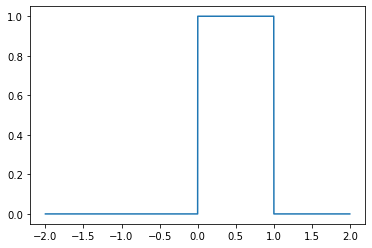

In [17]:
xs = np.arange(-2, 2, 0.001)
plt.plot(xs, [uniform_pdf(x, 0, 1) for x in xs])

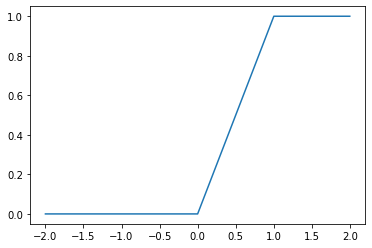

In [18]:
xs = np.arange(-2, 2, 0.001)
plt.plot(xs, [uniform_cdf(x, 0, 1) for x in xs])

# Random Variables

We say that $X$ is a *discrete* random variable if it takes value in some (finite or countably infinite) set $S$, and has an associated probability function $P$ such that

1. $0 \leq P(s) \leq 1 \; \forall s \in S$  and
2. $\sum_{s\in S} P(s) = 1.$

We sometimes call the triple $(X,S,P)$ a *probability space*.

Similarly, $X$ is a *continuous* random variable if it takes values in $S$ with distribution function $F: \mathbb{R} \to [0,1]$ where

1. $F$ is a (piecewise) continuous function,
2. $0 \leq F(x) \leq 1$ for all $x$,
3. $F(\infty) = \lim_{x \rightarrow \infty} F(x) = 1$, $F(-\infty) = 0$.

(Recall: $F(x) = P(X \leq x)$)

Example: let $X$ and $Y$ both be independent random variables with distribution $U(0,1)$.
Then they are both continuous with pdf $f(x) = x$.
Now we can talk about the event that both $X$ and $Y$ are less than $0.25$.
We can write this as $$ P(X < 0.25, Y < 0.25) = P(X < 0.25) P(Y < 0.25) = 0.25^2 = 0.0625. $$

When we look at data (e.g. adults data), the random variables are the "rows" of adult data and the values contained in there. For instance, we could look at the distribution of ages, the distribution of hours worked per week, the distribution of careers, income level, etc.

** Example: ** if we say $X$ has distribution $U(a, b)$ we mean $X$ has distribution
$$ F(x) = \begin{cases} 0 \quad x < a \\ \frac{x-a}{b-a} \quad a \leq x \leq b \\ 1 \quad x > b \end{cases} $$

If the context is unclear, we sometimes use $F sub X (X)$ t denote the distribution function (cdf) of X.

[]

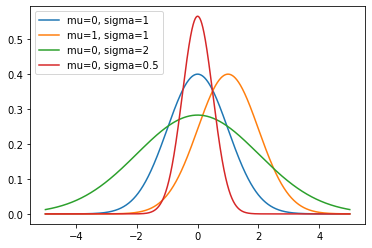

In [19]:
def normal_pdf(x, mu, sigma):
    return (np.exp(-1 * (x-mu)**2/(2 * sigma**2)))/(np.sqrt(2*np.pi*sigma))

xs = np.arange(-5, 5, 0.001)
plt.plot(xs, [normal_pdf(x, 0, 1) for x in xs], label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, 1, 1) for x in xs], label='mu=1, sigma=1')
plt.plot(xs, [normal_pdf(x, 0, 2) for x in xs], label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, 0, 0.5) for x in xs], label='mu=0, sigma=0.5')
plt.legend(loc=2)
plt.plot()

[]

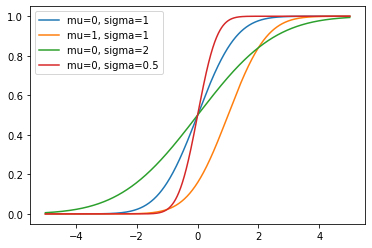

In [22]:
def normal_cdf(x, mu, sigma):
    return (1 + math.erf((x-mu)/(sigma*np.sqrt(2))))/2

xs = np.arange(-5, 5, 0.001)
plt.plot(xs, [normal_cdf(x, 0, 1) for x in xs], label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, 1, 1) for x in xs], label='mu=1, sigma=1')
plt.plot(xs, [normal_cdf(x, 0, 2) for x in xs], label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, 0, 0.5) for x in xs], label='mu=0, sigma=0.5')
plt.legend(loc=2)
plt.plot()